In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
import numpy as np

In [9]:
df.charges.quantile(.25)

4740.28715

In [11]:
df.charges.quantile(.50)

9382.033

In [12]:
df.charges.quantile(.75)

16639.912515

In [13]:
df.charges.mean()

13270.422265141257

In [15]:
from scipy.stats import kurtosis, skew

skew(df.charges,bias=False)


1.5158796580240383

In [16]:
kurtosis(df.charges,bias=False)

1.6062986532967916

In [17]:
df.charges.corr(df.bmi)

0.19834096883362892

In [18]:
from scipy import stats
stats.pearsonr(df.charges,df.age)

(0.29900819333064765, 4.8866933317203816e-29)

<AxesSubplot:>

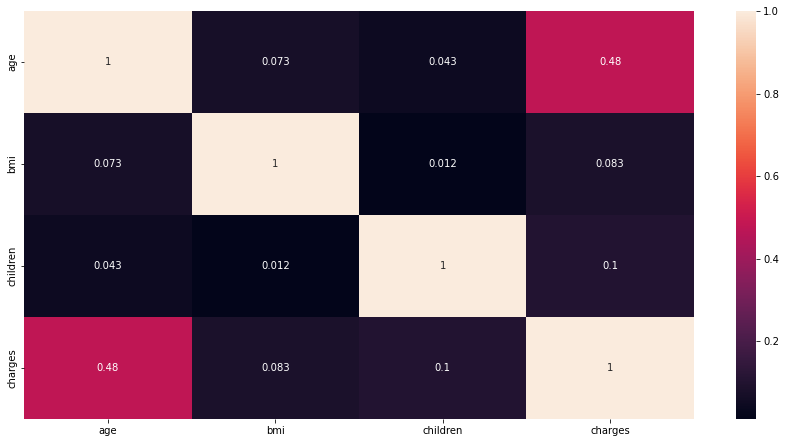

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df.corr(method='kendall')
plt.figure(figsize=(15,7.5))
sns.heatmap(df_corr, annot=True)

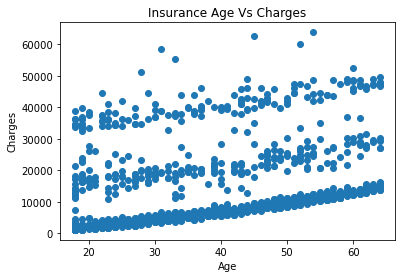

In [23]:
plt.scatter(df.age, df.charges)
plt.title("Insurance Age Vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [24]:
df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']
df_smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [25]:
df_nonsmoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


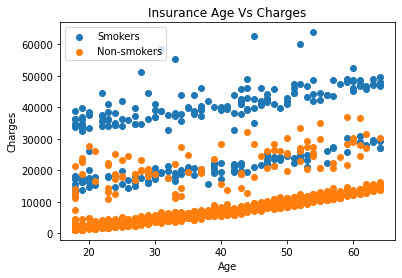

In [29]:
plt.scatter(df_smoker.age, df_smoker.charges, label='Smokers')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label='Non-smokers')
plt.title("Insurance Age Vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

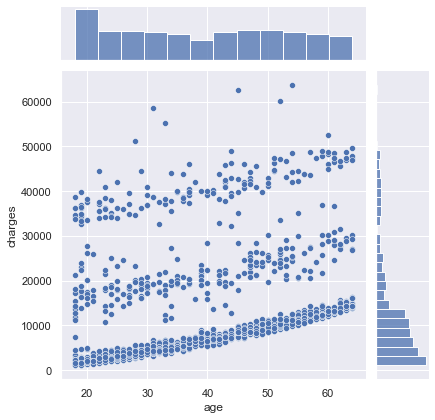

In [32]:
sns.set(color_codes=True)
sns.jointplot(x='age',y='charges',data=df)

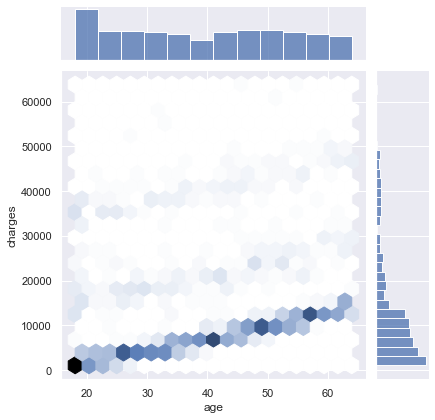

In [33]:
sns.jointplot(x='age',y='charges',data=df, kind='hex')

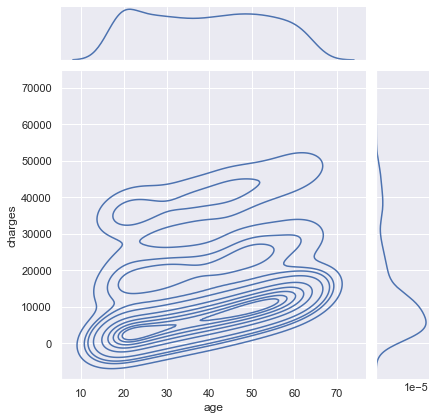

In [34]:
sns.jointplot(x='age',y='charges',data=df,kind='kde')

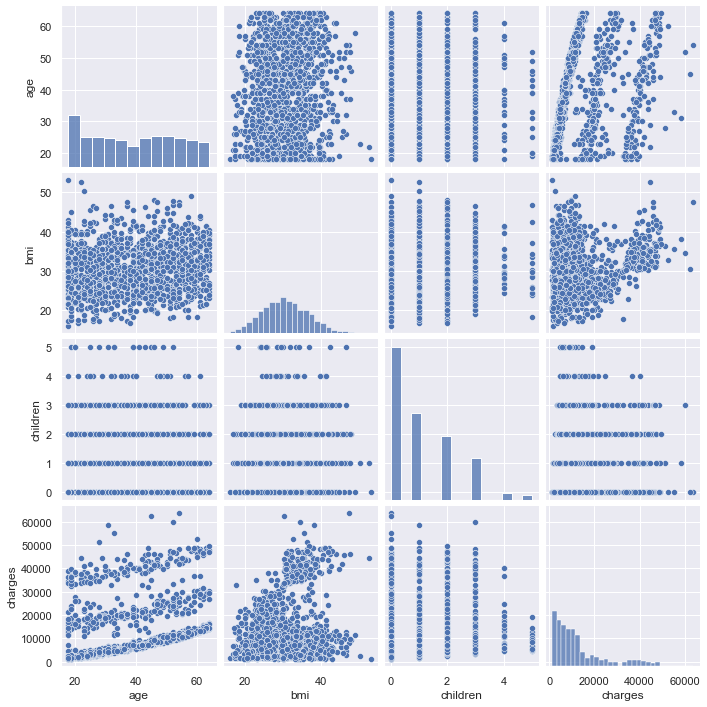

In [35]:
sns.pairplot(df)

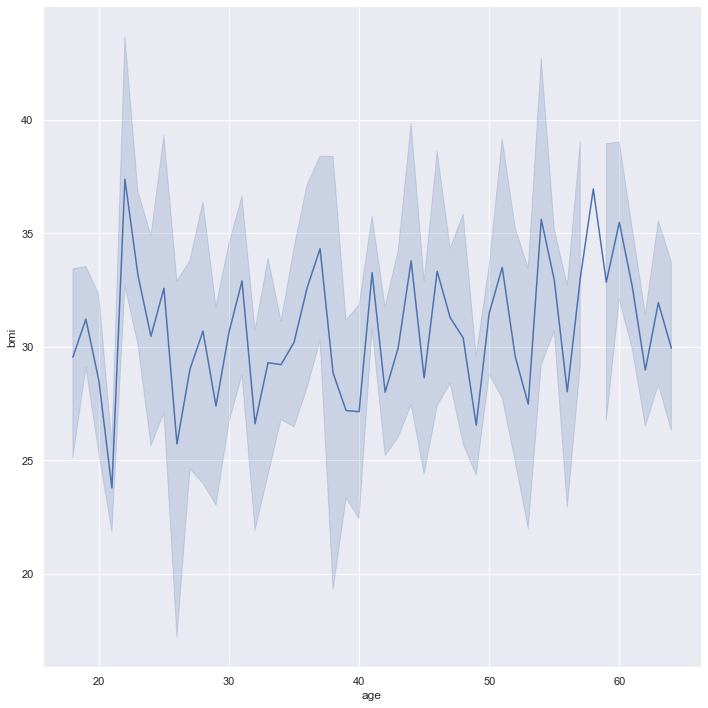

In [43]:
sns.relplot(data=df_smoker, x="age", y="bmi", kind="line",height=10)


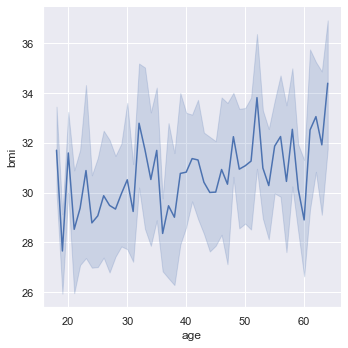

In [40]:
sns.relplot(data=df_nonsmoker, x="age", y="bmi", kind="line")

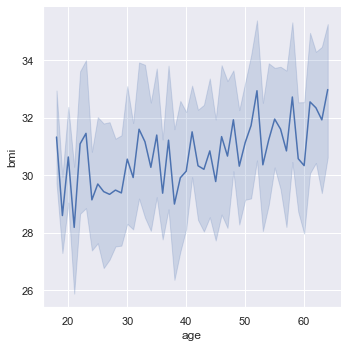

In [41]:
sns.relplot(data=df, x="age", y="bmi", kind="line")